# Look up table

## load in simulation

In [1]:
import numpy as np
import letrun
import datapath
from data_loader import *
from data_format import *
import tactile_gym
from simulation import *
import data
import matplotlib.pyplot as plt
import matplotlib
from lookuptable import *
from time import sleep
#matplotlib.use('TkAgg')


Using device: cuda
Using device: cuda


pybullet build time: Jan 21 2025 13:32:20


In [2]:
#load in environment
env=startSim(show_gui=0,show_tactile = 0,render = 0)
#load in dataset 
data=loaded(20)
#load in table
table=TABLE()
table_form=[]
pressures_=[]
pressures=3
for pressure in range(pressures):
    for trial in range(100): #gives you the ability to average over number of trials
        for i,y in enumerate(np.arange(0,1,0.1)): #move y along surface 
                for x in reversed(np.arange(0,1,0.1)): #move direction of x along
                        table_form.append([x,y])
                        pressures_.append(pressure)
table.add_dataset_to_table(data.X,data.y,np.array(table_form*10,dtype=np.uint8),np.array(pressures_),3)

argv[0]=
Loaded EGL 1.5 after reload.
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3090/PCIe/SSE2
GL_VERSION=4.6.0 NVIDIA 560.28.03
GL_SHADING_LANGUAGE_VERSION=4.60 NVIDIA
Version = 4.6.0 NVIDIA 560.28.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 3090/PCIe/SSE2


EGL device choice: -1 of 3.


ven = NVIDIA Corporation
ven = NVIDIA Corporation
Dataset size: 3000 
Window size: 20 
Image: (110, 120)
Memory needed: 0.74 GB


[10  0]
DEPTH 0


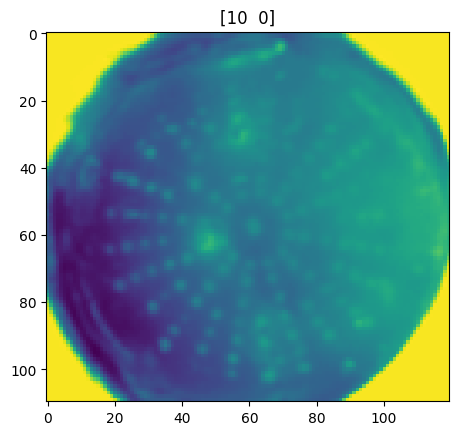

[9 1]
DEPTH 0


IndexError: index 1 is out of bounds for axis 0 with size 1

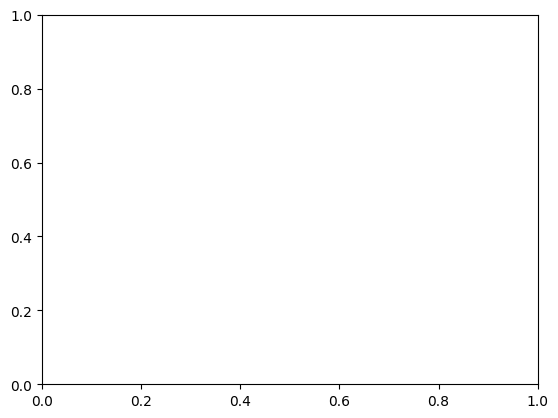

In [3]:
#test trial
r=10
env.reset()
#env.load_edge(friction=1)
for i in range(0,10,1):
    plt.cla()
    y=(np.abs(-i**2+r**2))**0.5
    env.step([i/10,y/10,(i/abs(i)) if i != 0 else 1])
    print(np.array([y,i],dtype=np.uint8))
    image=table.look_up(0,np.array([y,i],dtype=np.int8),0,2)
    plt.title(np.array([y,i],dtype=np.int8))
    plt.imshow(image)
    plt.pause(0.5)
    sleep(1)

plt.show()

# drag

In [ ]:
env.reset()
env._pb.removeBody(env.edge_stim_id)
env.load_edge(friction=100)
m=-1
for i in range(-40,50,1):
    if i<0:m=-1
    else: m=1
    env.step([m*10,m*10,0])

TypeError: EdgeFollowEnv.load_edge() got an unexpected keyword argument 'friction'

: 

## 